# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [101]:
# Loading dataset
training = pd.read_csv('/Users/eleanorzhu/Desktop/Qingchan Zhu/Loan Prediction/train_u6lujuX_CVtuZ9i.csv')
testing = pd.read_csv('/Users/eleanorzhu/Desktop/Qingchan Zhu/Loan Prediction/test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [102]:
train_original = training.copy()
predict_original = testing.copy()

In [103]:
training.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [104]:
testing.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

In [105]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [107]:
#pd.set_option('display.max_rows', None)
# to see how many null value in the training dataframe
training.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
# to see how many null value in the testing dataframe
testing.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Filling null values

### handel missing value for training dataset

In [109]:
# We impute missing values with mean, mode, median.
training['Gender'].fillna(training['Gender'].mode()[0], inplace=True)
training['Married'].fillna(training['Married'].mode()[0], inplace=True)
training['Dependents'].fillna(training['Dependents'].mode()[0], inplace=True)
training['Self_Employed'].fillna(training['Self_Employed'].mode()[0], inplace=True)
training['Credit_History'].fillna(training['Credit_History'].mode()[0], inplace=True)
training['Loan_Amount_Term'].fillna(training['Loan_Amount_Term'].mode()[0], inplace=True)
training['LoanAmount'].fillna(training['LoanAmount'].median(), inplace=True)

In [110]:
training.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### handel missing value for testing dataset

In [111]:
testing['Gender'].fillna(testing['Gender'].mode()[0], inplace=True)
testing['Married'].fillna(testing['Married'].mode()[0], inplace=True)
testing['Dependents'].fillna(testing['Dependents'].mode()[0], inplace=True)
testing['Self_Employed'].fillna(testing['Self_Employed'].mode()[0], inplace=True)
testing['Credit_History'].fillna(testing['Credit_History'].mode()[0], inplace=True)
testing['Loan_Amount_Term'].fillna(testing['Loan_Amount_Term'].mode()[0], inplace=True)
testing['LoanAmount'].fillna(testing['LoanAmount'].median(), inplace=True)

In [112]:
testing.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis¶

In [113]:
training['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}>

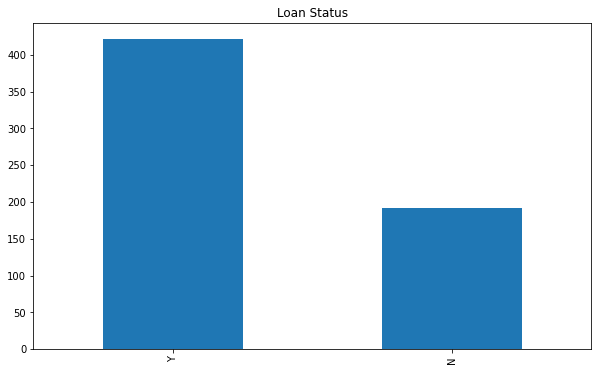

In [114]:
training['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

# The loan of 422(around 69%) people out of 614 was approved.

<AxesSubplot:title={'center':'Credit_History'}>

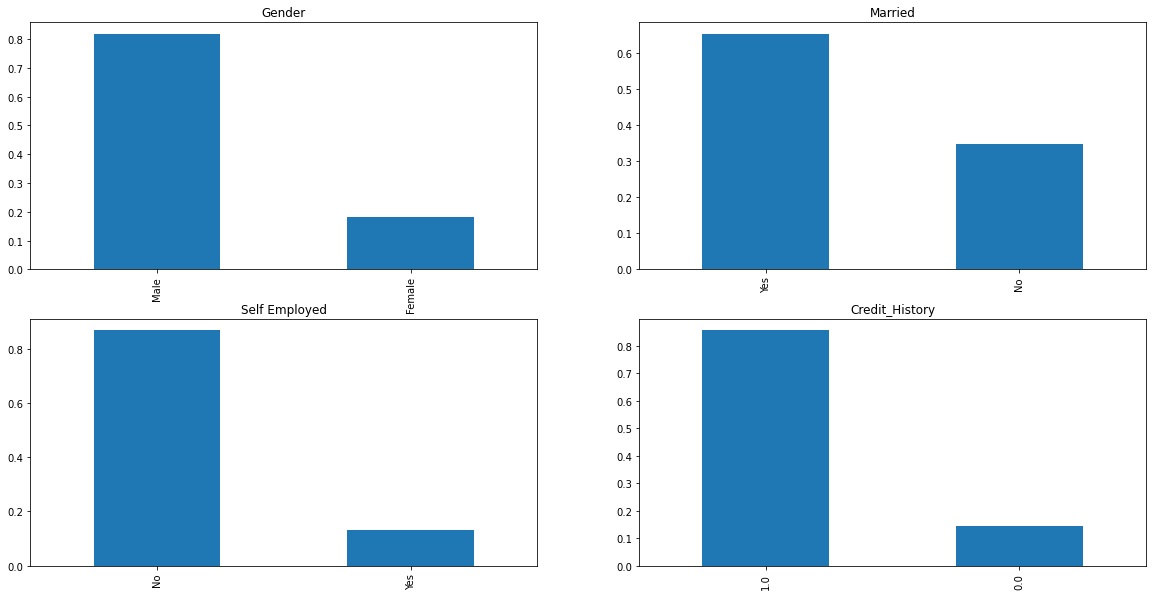

In [115]:
plt.figure(1)
plt.subplot(221)
training['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
training['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
training['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
training['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

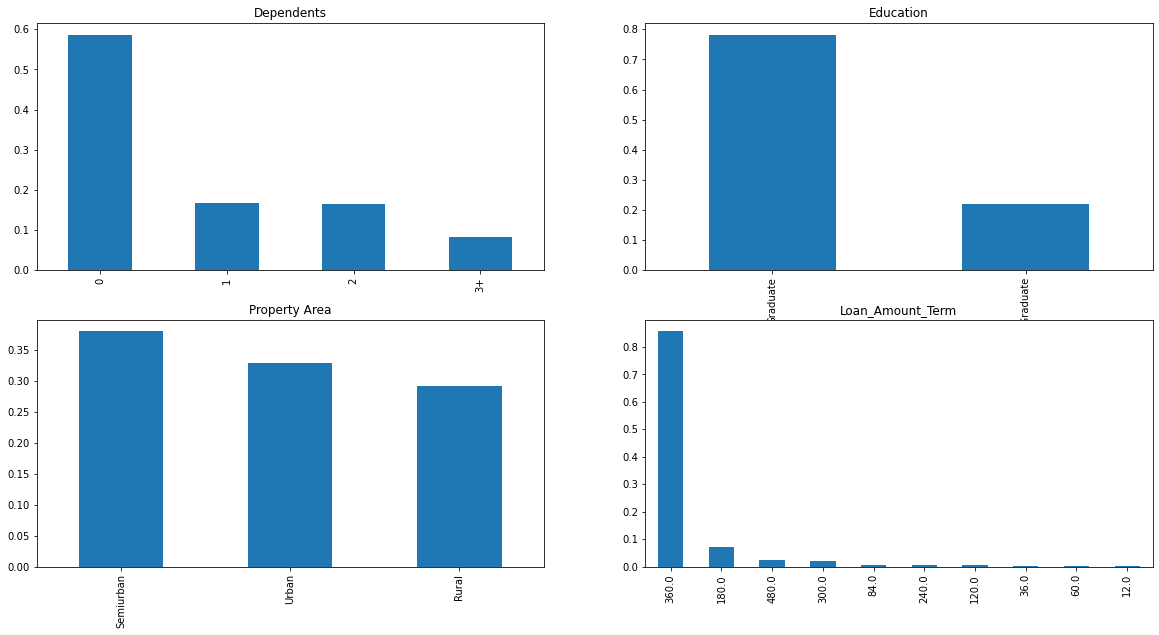

In [116]:
plt.figure(1)
plt.subplot(221)
training['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Dependents')
plt.subplot(222)
training['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(223)
training['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.subplot(224)
training['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.
- Most of the applicants are using 360.0 loan amount term.

/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

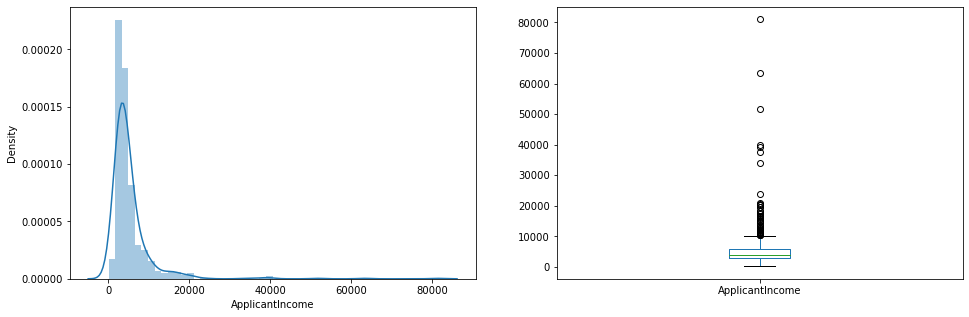

In [117]:
plt.figure(1)
plt.subplot(121)
sns.distplot(training['ApplicantIncome'])
plt.subplot(122)
training['ApplicantIncome'].plot.box(figsize=(16,5))

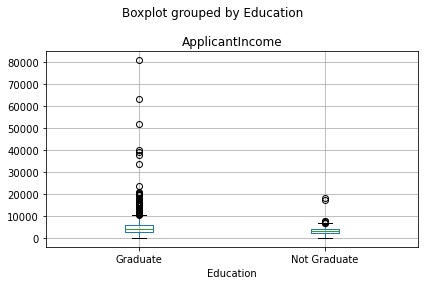

In [118]:
training.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

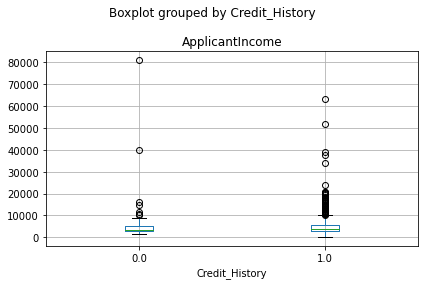

In [119]:
training.boxplot(column= 'ApplicantIncome', by='Credit_History')
plt.tight_layout()

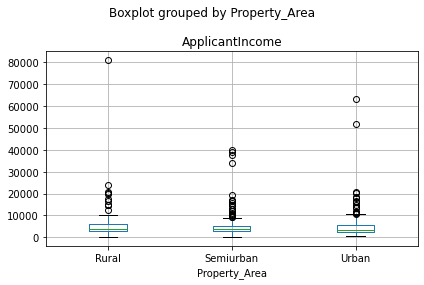

In [120]:
training.boxplot(column= 'ApplicantIncome', by='Property_Area')
plt.tight_layout()

### There are higher number of graduates with very high incomes which are appearing to be outliers.
### There are higher number of applicants has repaid the loan with higher incomes
### Applicants who live in Urban seems has higher incomes

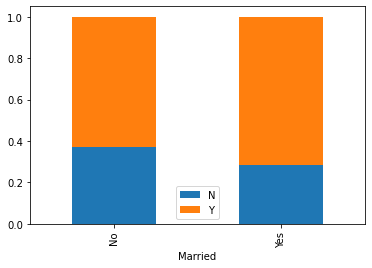

In [121]:
Married = pd.crosstab(training['Married'], training['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

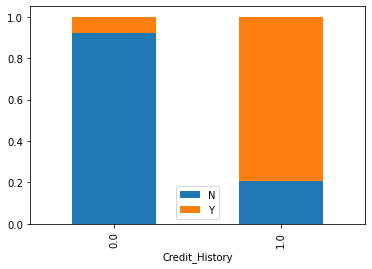

In [122]:
Credit_History = pd.crosstab(training['Credit_History'], training['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

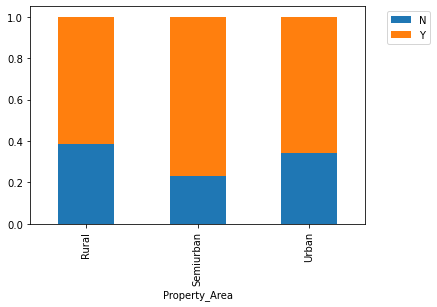

In [123]:
Property_Area = pd.crosstab(training['Property_Area'], training['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

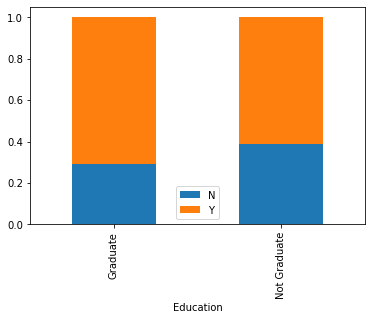

In [124]:
Education = pd.crosstab(training['Education'], training['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.
- people who graduated are more likely to get their loan approved.

In [125]:
training['Total_Income'] = training['ApplicantIncome'] + training['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
training['Total_Income_bin'] = pd.cut(training['Total_Income'], bins, labels=group)
training

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


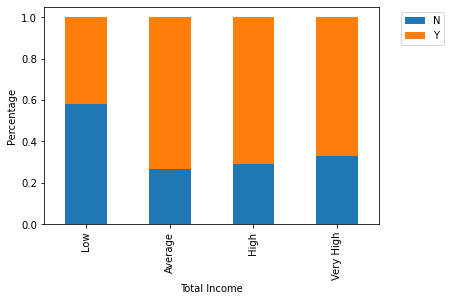

In [126]:
Total_Income_bin = pd.crosstab(training['Total_Income_bin'], training['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [127]:
training = training.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [128]:
training.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [129]:
training['Dependents'].replace('3+', 3, inplace=True)
testing['Dependents'].replace('3+', 3, inplace=True)
training['Loan_Status'].replace('N', 0, inplace=True)
training['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

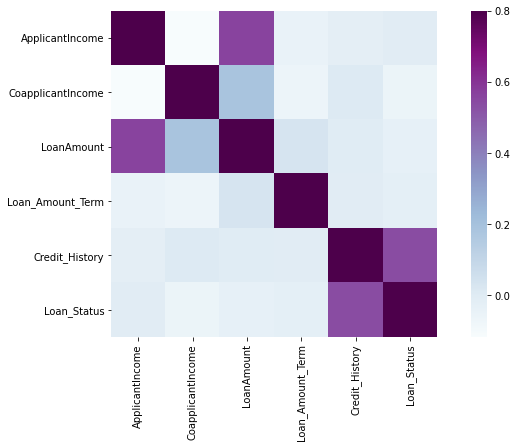

In [130]:
plt.figure(figsize=(12,6))
sns.heatmap(training.corr(), vmax=0.8, square=True, cmap='BuPu')

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Model Building

In [131]:
X = training.drop('Loan_Status', axis = 1)
y = training['Loan_Status']

### one hot encoding

In [132]:
X = pd.get_dummies(X)
training = pd.get_dummies(training)
testing = pd.get_dummies(testing)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
model = DecisionTreeClassifier(random_state=1)

In [137]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [138]:
predictions = model.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score, classification_report

In [140]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.47      0.56        55
           1       0.80      0.91      0.85       130

    accuracy                           0.78       185
   macro avg       0.74      0.69      0.71       185
weighted avg       0.77      0.78      0.76       185



In [141]:
print(accuracy_score(y_test, predictions))

0.7783783783783784


### Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [144]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [145]:
rfpredictions = rfmodel.predict(X_test)

In [146]:
print(accuracy_score(y_test, rfpredictions))

0.8108108108108109


In [147]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.80      0.98      0.88       130

    accuracy                           0.81       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.81      0.79       185



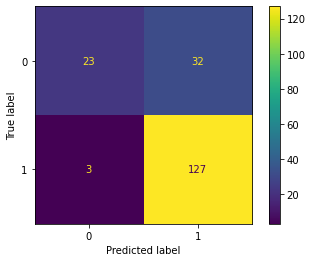

In [148]:
rf=ConfusionMatrixDisplay.from_estimator(rfmodel, X_test, y_test)

### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
logreg_model = LogisticRegression(random_state=1)
logreg_model.fit(X_train, y_train)
predictions = logreg_model.predict(X_test)

In [151]:
print("Logistic Regression Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, predictions))

Logistic Regression Model Evaluation:
Accuracy Score: 0.7783783783783784


In [152]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49        55
           1       0.78      0.95      0.86       130

    accuracy                           0.78       185
   macro avg       0.77      0.66      0.68       185
weighted avg       0.78      0.78      0.75       185



### Support vector machine

In [153]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [155]:
print("SVC Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, predictions))

SVC Model Evaluation:
Accuracy Score: 0.7027027027027027


In [156]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.70      1.00      0.83       130

    accuracy                           0.70       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.49      0.70      0.58       185



/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
gb = GradientBoostingClassifier(n_estimators=100,  # tree的个数
                                learning_rate=1.0,  # 学习率
                                max_depth=1,   # 叶子的最大深度
                                random_state=42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

In [159]:
print("XGBoost Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, predictions))

XGBoost Model Evaluation:
Accuracy Score: 0.8162162162162162


In [160]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.42      0.57        55
           1       0.80      0.98      0.88       130

    accuracy                           0.82       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.82      0.79       185



# hyparameter tuning

In [161]:
# Random Forest: Random Search Tuning
# Gradient Boosting Trees: Grid Search Tuning

In [162]:
### RF parameter tuning

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [164]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# n_estimators随机森林中树的个数
max_features = ['auto', 'sqrt']

In [165]:
# 每个树的最大叶子数
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [166]:
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [167]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [168]:
rf_random = RandomizedSearchCV(
    estimator = rfmodel,  # rf model
    param_distributions=random_grid, # 搜索参数
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1)

rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
51 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


Random Forest Classifier (Optimized)
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.80      0.98      0.88       130

    accuracy                           0.81       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.81      0.79       185



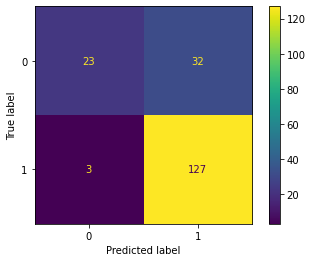

In [176]:
# Model again with the parameters after the search above:
rf_clf_search= RandomForestClassifier(n_estimators=1400,
                                   min_samples_split=5,
                                   min_samples_leaf=1,
                                   max_features='sqrt',
                                   max_depth=30,
                                   bootstrap=True)

rf_clf_search.fit(X_train,y_train)
y_rf_opt=rf_clf_search.predict(X_test)

print('Random Forest Classifier (Optimized)')

print(classification_report(y_test, y_rf_opt))

_rf_opt=ConfusionMatrixDisplay.from_estimator(rf_clf_search, X_test, y_test)

In [170]:
# Gradient boosting

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
param_test1 = {'n_estimators':range(20,100,10)}
param_test1

{'n_estimators': range(20, 100, 10)}

In [173]:
grid_search1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0,  # 待搜索模型
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, # 搜索参数
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)

grid_search1.fit(X_train,y_train)
grid_search1.best_params_

{'n_estimators': 20}

In [174]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=20,  # 搜索到的参数90
                                      learning_rate=1.0,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)
# 再次拟合
gb_clf_opt.fit(X_train,y_train)

y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))

Gradient Boosting (Optimized)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.70      1.00      0.83       130

    accuracy                           0.70       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.49      0.70      0.58       185



/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eleanorzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
pd.DataFrame(y_test).reset_index().groupby('Loan_Status').count()['index']

Loan_Status
0     55
1    130
Name: index, dtype: int64

In [184]:
pd.DataFrame(y_train).reset_index().groupby('Loan_Status').count()['index']

Loan_Status
0    137
1    292
Name: index, dtype: int64

In [180]:
pd.DataFrame(y_test).groupby('Loan_Status').count()

""
Loan_Status
0
1


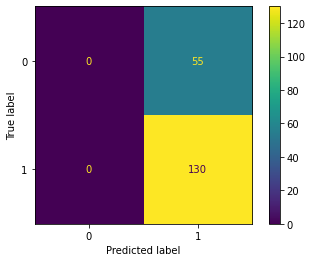

In [175]:
_gbopt=ConfusionMatrixDisplay.from_estimator(gb_clf_opt, X_test, y_test)
_gbopt

# bonus

# 1) missing value -> imputation 0 knn / regression 2) eda 3) model selection - logistic/knn/ rf / dt / xgboost 4) grid search -> hyparameter tuning 5) feature importance 6) featuring engineering - onehot 7) drop 1 col